In [7]:
# import necessary libraries and specify that graphs should be plotted inline. 

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (14,6)

from sklearn import tree
from sklearn import neighbors
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neural_network
from sklearn import svm
from sklearn import ensemble 
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from IPython.display import display, HTML
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split, StratifiedKFold
from sklearn.metrics.scorer import make_scorer
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from sklearn import metrics
import ggplot
import random
from sklearn.utils import shuffle
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from mlxtend.feature_selection import plot_sequential_feature_selection as plot_sfs

Populating the interactive namespace from numpy and matplotlib


In [48]:
!pip install pandas_profiling

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [9]:
# Contains restaurant IDs and ratings
df = pd.read_csv('4sqForMSBA.txt'
                 , names = ['id','DateValue','url','city','country','postalCode','state','price'
                            ,'rating','ratingSignals','photos','likes','name', 'dropthis']
                 , encoding = "ISO-8859-1"  # Required to avoid encoding error
                 , skiprows = 1)

df = df.drop('dropthis', axis = 1)

display(df[:][0:6])

C:\Users\Sahil Gupta\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,DateValue,url,city,country,postalCode,state,price,rating,ratingSignals,photos,likes,name
0,53ea7c44498eb372eabf7ba2,2015-02-18,http://t.co/PuJauMBn4S,Los Angeles,United States,90041,CA,NaN,NaN,NaN,14.0,2.0,The Habit Burger Grill
1,44e5e786f964a52073371fe3,2015-06-28,http://grubwithus.com,New York,United States,10003,NY,2,NaN,NaN,294.0,163.0,Cafetasia
2,4e1e5ec1d16488cf82f6cb1f,2015-05-22,http://mukasf.com,San Francisco,United States,94102,CA,1,7.9,54.0,88.0,32.0,Muka
3,5360453e498e91d4d671c0e2,2015-04-23,http://t.co/ixuY5oJd0O,Los Angeles,United States,90036,CA,1,7.8,26.0,31.0,19.0,Blaze Pizza
4,4b140f46f964a5209e9c23e3,2015-04-03,http://www.choptsalad.com,New York,United States,10036,NY,2,7.2,148.0,104.0,91.0,Chop't
5,3fd66200f964a520f6e41ee3,2015-03-17,http://2anyc.com,New York,United States,10009,NY,2,7.2,122.0,226.0,68.0,2A


In [10]:
restDate =  df[df['id']== '4fb6b8c8e4b02861a898c586'].sort(['DateValue']).reset_index()
print display(restDate)

C:\Users\Sahil Gupta\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,index,id,DateValue,url,city,country,postalCode,state,price,rating,ratingSignals,photos,likes,name
0,915908,4fb6b8c8e4b02861a898c586,2015-01-29,http://www.maslow6.com,New York,United States,10013,NY,NaN,8.2,40.0,36.0,31.0,Maslow 6 Wine Bar and Shop
1,1786175,4fb6b8c8e4b02861a898c586,2015-01-30,http://www.maslow6.com,New York,United States,10013,NY,NaN,8.2,40.0,36.0,32.0,Maslow 6 Wine Bar and Shop
2,704182,4fb6b8c8e4b02861a898c586,2015-01-31,http://www.maslow6.com,New York,United States,10013,NY,NaN,8.3,41.0,36.0,32.0,Maslow 6 Wine Bar and Shop
3,858372,4fb6b8c8e4b02861a898c586,2015-02-01,http://www.maslow6.com,New York,United States,10013,NY,NaN,8.3,41.0,36.0,32.0,Maslow 6 Wine Bar and Shop
4,1930656,4fb6b8c8e4b02861a898c586,2015-02-02,http://www.maslow6.com,New York,United States,10013,NY,NaN,8.3,41.0,36.0,32.0,Maslow 6 Wine Bar and Shop
5,1442042,4fb6b8c8e4b02861a898c586,2015-02-03,http://www.maslow6.com,New York,United States,10013,NY,NaN,8.3,41.0,36.0,32.0,Maslow 6 Wine Bar and Shop
6,1645100,4fb6b8c8e4b02861a898c586,2015-02-04,http://www.maslow6.com,New York,United States,10013,NY,NaN,8.3,41.0,36.0,32.0,Maslow 6 Wine Bar and Shop
7,1721643,4fb6b8c8e4b02861a898c586,2015-02-05,http://www.maslow6.com,New York,United States,10013,NY,NaN,8.3,41.0,36.0,32.0,Maslow 6 Wine Bar and Shop
8,1140547,4fb6b8c8e4b02861a898c586,2015-02-06,http://www.maslow6.com,New York,United States,10013,NY,NaN,8.3,41.0,36.0,32.0,Maslow 6 Wine Bar and Shop
9,2140013,4fb6b8c8e4b02861a898c586,2015-02-07,http://www.maslow6.com,New York,United States,10013,NY,NaN,8.2,41.0,36.0,32.0,Maslow 6 Wine Bar and Shop


None


In [11]:
print restDate['likes'].sum()

5660.0


In [12]:
restDate.to_csv('doubtAboutDate.csv', index = False)

In [13]:
print len(np.unique(df['id']))

15042


In [14]:
print len(df['id'])

2438931


In [15]:
print len(np.unique(df['id']))

15042


# Aggregating

In [16]:
allVar = ['id', 'url', 'city', 'country', 'postalCode', 'state', 'price', 'rating', 'ratingSignals', 
         'photos', 'likes', 'name']

level = ['id', 'city', 'country', 'postalCode', 'state', 'name']

joinLevel = ['id', 'city', 'country', 'postalCode', 'state']

secondJoinLevel = ['id', 'city', 'country', 'state']

uniqueDf = df[level].dropna().drop_duplicates(joinLevel, keep="last")

In [17]:
restCheck =  uniqueDf[uniqueDf['id']== '4fb6b8c8e4b02861a898c586'].reset_index()
print display(restCheck)

,index,id,city,country,postalCode,state,name
0,2434652,4fb6b8c8e4b02861a898c586,New York,United States,10013,NY,Maslow 6 Wine Bar and Shop


None


In [18]:
print len(np.unique(uniqueDf['id']))

15015


In [19]:
#display(aggr.groupby(['id']).count())

### Getting the latest price and rating

In [20]:
recentPrice = df[['price','id', 'city', 'country', 'state'
,'DateValue']].dropna().sort_values(by=['DateValue']).drop_duplicates(secondJoinLevel, keep="last").drop(['DateValue'], axis=1)

recentRating = df[['rating','id', 'city', 'country', 'state'
,'DateValue']].dropna().sort_values(by=['DateValue']).drop_duplicates(secondJoinLevel, keep="last").drop(['DateValue'], axis=1)

recentRatingSignals = df[['ratingSignals','id', 'city', 'country', 'state'
,'DateValue']].dropna().sort_values(by=['DateValue']).drop_duplicates(secondJoinLevel, keep="last").drop(['DateValue'], axis=1)

recentPhotos = df[['photos','id', 'city', 'country', 'state'
,'DateValue']].dropna().sort_values(by=['DateValue']).drop_duplicates(secondJoinLevel, keep="last").drop(['DateValue'], axis=1)

recentLikes = df[['likes','id', 'city', 'country', 'state'
,'DateValue']].dropna().sort_values(by=['DateValue']).drop_duplicates(secondJoinLevel, keep="last").drop(['DateValue'], axis=1)

In [21]:
recent = pd.merge(pd.merge(pd.merge(pd.merge(recentPrice,recentRating,on=secondJoinLevel,how='outer'),recentRatingSignals,on=secondJoinLevel,how='outer'), 
                           recentPhotos,on=secondJoinLevel,how='outer'),recentLikes, on=secondJoinLevel,how='outer')

In [22]:
print len(recent)

15118


In [23]:
display(recent[1:5])

,price,id,city,country,state,rating,ratingSignals,photos,likes
1,2,53c80344498eae8c726bc547,New York,United States,NY,6.9,25.0,20.0,17.0
2,2,51265ecc3d7cdad3ace703b5,Chicago,United States,IL,6.1,93.0,124.0,33.0
3,1,4eb601def790d87d02ffec11,New York,United States,NY,6.8,29.0,57.0,12.0
4,2,53d35ffe498e0e67a7d355ad,San Francisco,United States,CA,6.2,13.0,18.0,6.0


In [24]:
aggr = pd.merge(recent, uniqueDf[level], on=secondJoinLevel, how='right')

In [25]:
restCheck =  aggr[aggr['id']== '543fd898498e66a3b41df6b3'].reset_index()
print display(restCheck)

,index,price,id,city,country,state,rating,ratingSignals,photos,likes,postalCode,name
0,367,2,543fd898498e66a3b41df6b3,New York,United States,NY,8.8,94.0,53.0,66.0,10003,Korilla BBQ


None


In [26]:
print len(aggr)

15486


In [27]:
print len(np.unique(aggr['id']))

15015


In [28]:
aggr.columns

Index([u'price', u'id', u'city', u'country', u'state', u'rating',
       u'ratingSignals', u'photos', u'likes', u'postalCode', u'name'],
      dtype='object')

In [29]:
display(aggr.sort(['id']))

C:\Users\Sahil Gupta\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,price,id,city,country,state,rating,ratingSignals,photos,likes,postalCode,name
1460,1,3fd66200f964a52000e71ee3,New York,United States,NY,8.8,1257.0,855.0,913.0,10014,Fat Cat
12548,1,3fd66200f964a52001e81ee3,New York,United States,NY,6.2,298.0,325.0,116.0,10022,Turtle Bay NYC
13281,1,3fd66200f964a52001ef1ee3,Los Angeles,United States,CA,8.1,106.0,92.0,72.0,90029,4100 Bar
13111,2,3fd66200f964a52002ee1ee3,Chicago,United States,IL,7.9,121.0,90.0,59.0,60657,Schoolyard Tavern & Grill
14566,2,3fd66200f964a52002ef1ee3,Los Angeles,United States,CA,8.5,165.0,454.0,107.0,90026,The Short Stop
7815,1,3fd66200f964a52003e51ee3,New York,United States,NY,7.4,100.0,117.0,60.0,10009,Manitoba's
12670,3,3fd66200f964a52003e81ee3,New York,United States,NY,7.1,99.0,114.0,60.0,10022,Whiskey Blue
9848,2,3fd66200f964a52004e61ee3,New York,United States,NY,9.3,1160.0,1297.0,744.0,10012,Café Habana
6739,1,3fd66200f964a52005e41ee3,New York,United States,NY,7.1,234.0,92.0,146.0,10002,The Magician
13399,2,3fd66200f964a52005e71ee3,New York,United States,NY,8.9,398.0,935.0,304.0,10014,S.O.B.'s


In [30]:
rest_list = pd.read_csv('PredictiveRestaurantList5000.csv', header = None, names = ['id', 'dropthis'])
rest_list = rest_list.drop('dropthis', axis = 1)
rest_list['id'] = rest_list['id'].str.replace("'", "")

rest_list.head()

,id
0,4800619cf964a520ec4e1fe3
1,3fd66200f964a5206fe91ee3
2,3fd66200f964a520e9e61ee3
3,40b68100f964a52086001fe3
4,3fd66200f964a520f6e41ee3


In [31]:
tips = pd.read_csv('tips.txt', encoding = "ISO-8859-1")  # Required to avoid encoding error

tips.head()

,venue_id,user_id,id,likes,createdAt,collected,tip
0,457c232bf964a520fe3e1fe3,32,481f806f70c603bbbf0c8eb4,17,1210024047,2015-01-12 11:27:14.180000000,Go to Barbone (13th and B?) and order up off t...
1,3fd66200f964a52000e71ee3,43,48edee3170c603bbca0c8eb4,20,1223552561,2015-01-14 10:51:02.087000000,Fat Cat75 Christopher @ 7th Ave.Pool Ping Pong...
2,3fd66200f964a5203de41ee3,43,48edef9270c603bbcc0c8eb4,29,1223552914,2015-01-11 08:12:06.793000000,Decibel 240 E 9th StreetOne of the best Sake B...
3,3fd66200f964a52047e51ee3,43,48ee839f70c603bbce0c8eb4,17,1223590815,2015-01-19 15:06:47.453000000,Otto's Shrunken Head Every Third Friday of the...
4,3fd66200f964a5208de81ee3,65,48fc850470c603bbd60c8eb4,61,1224508676,2015-01-29 20:53:25.643000000,Go to Rudy's in Midtown (627 Ninth Ave.) and g...


In [32]:
display(tips)

,venue_id,user_id,id,likes,createdAt,collected,tip
0,457c232bf964a520fe3e1fe3,32,481f806f70c603bbbf0c8eb4,17,1210024047,2015-01-12 11:27:14.180000000,Go to Barbone (13th and B?) and order up off t...
1,3fd66200f964a52000e71ee3,43,48edee3170c603bbca0c8eb4,20,1223552561,2015-01-14 10:51:02.087000000,Fat Cat75 Christopher @ 7th Ave.Pool Ping Pong...
2,3fd66200f964a5203de41ee3,43,48edef9270c603bbcc0c8eb4,29,1223552914,2015-01-11 08:12:06.793000000,Decibel 240 E 9th StreetOne of the best Sake B...
3,3fd66200f964a52047e51ee3,43,48ee839f70c603bbce0c8eb4,17,1223590815,2015-01-19 15:06:47.453000000,Otto's Shrunken Head Every Third Friday of the...
4,3fd66200f964a5208de81ee3,65,48fc850470c603bbd60c8eb4,61,1224508676,2015-01-29 20:53:25.643000000,Go to Rudy's in Midtown (627 Ninth Ave.) and g...
5,3fd66200f964a52048e81ee3,33,4933c84270c603bbe60c8eb4,10,1228130370,2015-01-29 16:38:38.533000000,French her at Cafe Lalo (what?! i'm talking ab...
6,49dbff50f964a5203d5f1fe3,33,493be88170c603bbec0c8eb4,24,1228662913,2015-01-14 23:39:27.577000000,butter lane cupcakes: get the blueberry cream ...
7,3fd66200f964a52058eb1ee3,33,493bf24670c603bbee0c8eb4,68,1228665414,2015-01-22 21:32:58.370000000,takoyaki (octopus balls) and okonomiyaki (panc...
8,433dd180f964a52047281fe3,32,493e370770c603bbf20c8eb4,102,1228814087,2015-01-09 05:47:40.637000000,Winter time + midweek + Backroom + fireplace =...
9,3fd66200f964a52029e31ee3,52,493e5d8e70c603bbf40c8eb4,22,1228823950,2015-01-19 08:19:52.960000000,Cherry Tavern is a great way to start off your...


In [33]:
print len(np.unique(tips['venue_id']))
print len(np.unique(tips['user_id']))

4999
56713


In [34]:
tips.groupby('user_id').count()

,venue_id,id,likes,createdAt,collected,tip
user_id,,,,,,
32,135,135,135,135,135,135
33,166,166,166,166,166,166
37,31,31,31,31,31,31
40,2,2,2,2,2,2
43,7,7,7,7,7,7
44,9,9,9,9,9,9
45,11,11,11,11,11,11
46,11,11,11,11,11,11
52,43,43,43,43,43,43


In [35]:
# Reducing aggr to only the restaurants contained in the list
aggr = aggr.merge(rest_list[['id']], on = 'id', how='inner')
display(aggr)

,price,id,city,country,state,rating,ratingSignals,photos,likes,postalCode,name
0,2,53c80344498eae8c726bc547,New York,United States,NY,6.9,25.0,20.0,17.0,10010,J. Gumbo's
1,2,5403c5f5498e07039eb52e53,New York,United States,NY,8.3,41.0,31.0,23.0,10014,Mulino a Vino
2,2,514b5d04fe70d90c81337d4c,Austin,United States,TX,6.5,24.0,13.0,17.0,78702,WuWu Sushi
3,2,53e556a3498ed7b6e9d498d2,New York,United States,NY,7.4,53.0,24.0,29.0,10009,Lovecraft
4,3,52aa54ec11d261e0be7777b8,New York,United States,NY,6.6,56.0,56.0,32.0,10001,OCabanon
5,2,51ef14d6498e0e94e8ba53a9,New York,United States,NY,7.6,74.0,38.0,48.0,10002,Amuse Wine Bar
6,1,542c7a91498e8670fab116de,San Francisco,United States,CA,8.6,25.0,11.0,17.0,94109,Lush Gelato
7,3,44d9e8dbf964a5208a361fe3,New York,United States,NY,8.5,1096.0,1128.0,735.0,10012,Dean & DeLuca
8,2,47f64f56f964a520a94e1fe3,San Francisco,United States,CA,9.4,396.0,333.0,318.0,94110,Bi-Rite Market
9,4,45e6c3e8f964a5204e431fe3,Austin,United States,TX,7.7,46.0,91.0,28.0,78701,Ruth's Chris Steak House


In [36]:
len(aggr)

5103

In [37]:
aggr.describe()

C:\Users\Sahil Gupta\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,rating,ratingSignals,photos,likes
count,5102.000000,5102.000000,5103.000000,5103.000000
mean,7.949941,195.338887,220.951009,122.078973
std,0.908484,236.203218,316.448997,168.792868
min,4.900000,20.000000,0.000000,14.000000
25%,NaN,NaN,65.000000,35.000000
50%,NaN,NaN,127.000000,67.000000
75%,NaN,NaN,256.500000,139.000000
max,9.600000,5436.000000,5858.000000,4343.000000


In [50]:
import pandas_profiling

pandas_profiling.ProfileReport(aggr)

Number of variables,11
Number of observations,5103
Total Missing (%),0.0%
Total size in memory,478.4 KiB
Average record size in memory,96.0 B
Numeric,3
Categorical,6
Date,0
Text (Unique),0
Rejected,2
Distinct count,12


In [51]:
print 'n'

n


In [52]:
tips.head()

,venue_id,user_id,id,likes,createdAt,collected,tip,tip_without_num,tip_without_letter
0,457c232bf964a520fe3e1fe3,32,481f806f70c603bbbf0c8eb4,17,1210024047,2015-01-12 11:27:14.180000000,Go to Barbone (13th and B?) and order up off t...,go to barbone ( and b?) and order up off the ...,go to barbone ( and b?) and order up off the ...
1,3fd66200f964a52000e71ee3,43,48edee3170c603bbca0c8eb4,20,1223552561,2015-01-14 10:51:02.087000000,Fat Cat75 Christopher @ 7th Ave.Pool Ping Pong...,fat cat christopher @ ave pool ping pong shuf...,fat cat christopher @ ave pool ping pong shuf...
2,3fd66200f964a5203de41ee3,43,48edef9270c603bbcc0c8eb4,29,1223552914,2015-01-11 08:12:06.793000000,Decibel 240 E 9th StreetOne of the best Sake B...,decibel e streetone of the best sake bars in...,decibel streetone of the best sake bars in le...
3,3fd66200f964a52047e51ee3,43,48ee839f70c603bbce0c8eb4,17,1223590815,2015-01-19 15:06:47.453000000,Otto's Shrunken Head Every Third Friday of the...,otto's shrunken head every third friday of the...,otto's shrunken head every third friday of the...
4,3fd66200f964a5208de81ee3,65,48fc850470c603bbd60c8eb4,61,1224508676,2015-01-29 20:53:25.643000000,Go to Rudy's in Midtown (627 Ninth Ave.) and g...,go to rudy's in midtown ( ninth ave ) and get ...,go to rudy's in midtown ( ninth ave ) and get ...


### Removing any numbers or single letters

In [53]:
import re

tips['tip_without_num'] = [re.sub(r'\d+\S*', '', row.lower().replace('.',' ').replace('_','').replace('/','')) for row in tips['tip']]

tips['tip_without_letter'] = [re.sub(r'(?:^| )\w(?:$| )', '', row) for row in tips['tip_without_num']]

In [54]:
print tips['tip_without_letter'][1:5]

1    fat cat christopher @  ave pool ping pong shuf...
2    decibel  streetone of the best sake bars in le...
3    otto's shrunken head every third friday of the...
4    go to rudy's in midtown ( ninth ave ) and get ...
Name: tip_without_letter, dtype: object


In [55]:
print len(np.unique(tips['venue_id']))

4999


In [56]:
sortedTips = tips.sort(['venue_id'])
sortedTips = sortedTips.reset_index(drop=True)

print display(sortedTips[:2])

C:\Users\Sahil Gupta\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,venue_id,user_id,id,likes,createdAt,collected,tip,tip_without_num,tip_without_letter
0,3fd66200f964a52000e71ee3,12539177,50791053e4b0b5e91f90a490,7,1350111315,2014-11-21 19:32:42.790000000,This place is a great rainy day hang out late ...,this place is a great rainy day hang out late ...,this place isgreat rainy day hang out late nig...
1,3fd66200f964a52000e71ee3,13838,4a1afc2870c603bb89288eb4,11,1243282472,2015-01-14 10:51:02.087000000,Go to Fat Cat and play ping pong.,go to fat cat and play ping pong,go to fat cat and play ping pong


None


### Grouping tips against the same restaurant into one string

In [57]:
groupedTips = sortedTips.groupby('venue_id')['tip_without_letter'].apply(lambda x: "{%s}" % ''.join(x))

In [58]:
groupedTips = pd.DataFrame(groupedTips)
groupedTips['id'] = groupedTips.index
groupedTips = groupedTips.reset_index(drop=True)

In [59]:
print display(groupedTips[1:10])

,tip_without_letter,id
1,{hated it here douchbags glore attention all g...,3fd66200f964a52001e81ee3
2,{look for chassis crass' roller derby jersey o...,3fd66200f964a52003e51ee3
3,{years of beinggreat post work barthought it w...,3fd66200f964a52003e81ee3
4,{go to the cafe next door on elizabeth street ...,3fd66200f964a52004e61ee3
5,{magic beer friends pool just awesome quit...,3fd66200f964a52005e41ee3
6,{the best place in town to see live shows foo...,3fd66200f964a52005e71ee3
7,{bloody mary's for brunch are awesome!strong d...,3fd66200f964a52005e81ee3
8,{best foie gras in nyc! thanks for telling us ...,3fd66200f964a52006e61ee3
9,{nice place to hear some irish music or bands ...,3fd66200f964a52006e81ee3


None


In [60]:
groupedCounts = sortedTips[['venue_id','id']].groupby('venue_id').count().reset_index(drop=False)

groupedCounts.rename(columns={'id': 'count of tips', 'venue_id' : 'id'}, inplace=True)

### Merging the restaurant's aggregated dataset with the grouped tips dataset on venue_id

In [61]:
combined = pd.merge(aggr, groupedTips, how='inner', on='id').reset_index(drop=False)

combinedAll = pd.merge(combined, groupedCounts, how='inner', on='id').reset_index(drop=False)

In [62]:
aggr.columns

Index([u'price', u'id', u'city', u'country', u'state', u'rating',
       u'ratingSignals', u'photos', u'likes', u'postalCode', u'name'],
      dtype='object')

In [63]:
print len(combinedAll)

5102


In [64]:
print display(combinedAll[1:5])

,level_0,index,price,id,city,country,state,rating,ratingSignals,photos,likes,postalCode,name,tip_without_letter,count of tips
1,1,1,2,5403c5f5498e07039eb52e53,New York,United States,NY,8.3,41.0,31.0,23.0,10014,Mulino a Vino,{cute place downstairs everything is homemade ...,31
2,2,2,2,514b5d04fe70d90c81337d4c,Austin,United States,TX,6.5,24.0,13.0,17.0,78702,WuWu Sushi,{fish chop- no mayo no cream cheese ?? the own...,9
3,3,3,2,53e556a3498ed7b6e9d498d2,New York,United States,NY,7.4,53.0,24.0,29.0,10009,Lovecraft,{beautiful decor friendly service great drinks...,25
4,4,4,3,52aa54ec11d261e0be7777b8,New York,United States,NY,6.6,56.0,56.0,32.0,10001,OCabanon,{the wine list is fabulous and the desserts ar...,21


None


### Generating tokens

In [65]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

example = combinedAll['tip_without_letter']

tokenized_sents = [tokenizer.tokenize(i) for i in example]
tokens = []
for i in tokenized_sents:
    tokens.append(i)

combinedAll['tokenized_sents'] = pd.Series(tokens)

In [66]:
newTokens = []
for row in tokenized_sents:
    newTokens.append(filter(lambda x : len(x) <> 1, row))
                     
combinedAll['tokenized_sents'] = newTokens

In [67]:
display(combinedAll[1:5])

,level_0,index,price,id,city,country,state,rating,ratingSignals,photos,likes,postalCode,name,tip_without_letter,count of tips,tokenized_sents
1,1,1,2,5403c5f5498e07039eb52e53,New York,United States,NY,8.3,41.0,31.0,23.0,10014,Mulino a Vino,{cute place downstairs everything is homemade ...,31,"[cute, place, downstairs, everything, is, home..."
2,2,2,2,514b5d04fe70d90c81337d4c,Austin,United States,TX,6.5,24.0,13.0,17.0,78702,WuWu Sushi,{fish chop- no mayo no cream cheese ?? the own...,9,"[fish, chop, no, mayo, no, cream, cheese, the,..."
3,3,3,2,53e556a3498ed7b6e9d498d2,New York,United States,NY,7.4,53.0,24.0,29.0,10009,Lovecraft,{beautiful decor friendly service great drinks...,25,"[beautiful, decor, friendly, service, great, d..."
4,4,4,3,52aa54ec11d261e0be7777b8,New York,United States,NY,6.6,56.0,56.0,32.0,10001,OCabanon,{the wine list is fabulous and the desserts ar...,21,"[the, wine, list, is, fabulous, and, the, dess..."


### Removing stopwords

In [68]:
from nltk.corpus import stopwords
#stopwords_new = [str(word) for word in stopwords.words('english')]

filtered_words = []
for row in combinedAll['tokenized_sents']:
    filtered_words.append([word.lower() for word in row if word.lower() not in stopwords.words('english')])

combinedAll['filtered_words'] = filtered_words

In [69]:
print combinedAll['filtered_words'][2]

[u'fish', u'chop', u'mayo', u'cream', u'cheese', u'owners', u'rad', u'pretty', u'much', u'best', u'gyoza', u'ever', u'orderclay', u'bartenders', u'super', u'nice', u'pear', u'basil', u'supper', u'best', u'summer', u'drink', u'orderclay', u'slowest', u'service', u'ever', u'experienced', u'atsushi', u'spot', u'atx', u'food', u'great', u'unless', u'want', u'wait', u'hours', u'food', u'go', u'maiko', u'frank', u'crew', u'bomb', u'da', u'lotus', u'da', u'bomb']


In [70]:
print combinedAll['tokenized_sents'][2]

[u'fish', u'chop', u'no', u'mayo', u'no', u'cream', u'cheese', u'the', u'owners', u'are', u'rad', u'pretty', u'much', u'the', u'best', u'gyoza', u'ever', u'orderclay', u'the', u'bartenders', u'are', u'super', u'nice', u'pear', u'basil', u'supper', u'is', u'the', u'best', u'summer', u'drink', u'orderclay', u'slowest', u'service', u'we', u've', u'ever', u'experienced', u'atsushi', u'spot', u'in', u'atx', u'food', u'was', u'great', u'but', u'unless', u'you', u'want', u'to', u'wait', u'for', u'hours', u'for', u'your', u'food', u'go', u'to', u'maiko', u'frank', u'and', u'crew', u'are', u'the', u'bomb', u'da', u'lotus', u'is', u'da', u'bomb']


### Performing stemming

In [71]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

stemmed_words = []
for row in combinedAll['filtered_words']:
    stemmed_words.append([lmtzr.lemmatize(word.lower()) for word in row if word.lower() not in stopwords.words('english')]) 
    
combinedAll['stemmed_words'] = stemmed_words

In [73]:
allWords = []
nonASCII = []

for row in stemmed_words:
    for word in row:
        try:
            allWords.append(str(word))
        except:
            nonASCII.append(word)

In [74]:
uniqueWords = np.unique(allWords)

In [75]:
print combinedAll['filtered_words'][3]

[u'beautiful', u'decor', u'friendly', u'service', u'great', u'drinks', u'go', u'jules', u'verne', u'decor', u'almost', u'lights', u'high', u'bartender', u'humorless', u'chat', u'blah', u'cocktail', u'list', u'felt', u'like', u'opportunity', u'missed', u'bar', u'died', u'servingspecial', u'cocktail', u'called', u'clementini', u'nyc', u'cocktail', u'week', u'july', u'music', u'awful', u'lighting', u'nowhere', u'near', u'dark', u'enough', u'never', u'seen', u'many', u'wannabe', u'poser', u'nerds', u'anywhere', u'else', u'nyc', u'real', u'nerds', u'go', u'metal', u'barsguess', u'interesting', u'vodka', u'infusions', u'hadcarrot', u'chai', u'vodka', u'tasty', u'however', u'cocktail', u'menu', u'lackluster', u'definitely', u'need', u'design', u'drinks', u'incorporate', u'wonderful', u'vodkas', u'head', u'lovecraft', u'upstairs', u'isbar', u'restaurant', u'fun', u'cocktails', u'italian', u'leaning', u'food', u'menu', u'downstairs', u'isstage', u'jazz', u'bands', u'nouveau', u'balkan', u'group

In [76]:
print combinedAll['stemmed_words'][3]

[u'beautiful', u'decor', u'friendly', u'service', u'great', u'drink', u'go', u'jules', u'verne', u'decor', u'almost', u'light', u'high', u'bartender', u'humorless', u'chat', u'blah', u'cocktail', u'list', u'felt', u'like', u'opportunity', u'missed', u'bar', u'died', u'servingspecial', u'cocktail', u'called', u'clementini', u'nyc', u'cocktail', u'week', u'july', u'music', u'awful', u'lighting', u'nowhere', u'near', u'dark', u'enough', u'never', u'seen', u'many', u'wannabe', u'poser', u'nerd', u'anywhere', u'else', u'nyc', u'real', u'nerd', u'go', u'metal', u'barsguess', u'interesting', u'vodka', u'infusion', u'hadcarrot', u'chai', u'vodka', u'tasty', u'however', u'cocktail', u'menu', u'lackluster', u'definitely', u'need', u'design', u'drink', u'incorporate', u'wonderful', u'vodka', u'head', u'lovecraft', u'upstairs', u'isbar', u'restaurant', u'fun', u'cocktail', u'italian', u'leaning', u'food', u'menu', u'downstairs', u'isstage', u'jazz', u'band', u'nouveau', u'balkan', u'group', u'play

In [77]:
print len(uniqueWords)
print uniqueWords[1:12]

79152
['aaa' 'aaaaaaa' 'aaaaamazing' 'aaaah' 'aaaahhh' 'aaaahhhh' 'aaaamazing'
 'aaaamazingthe' 'aaaarrooomma' 'aaand' 'aaarrrggghhh']


In [59]:
stemmed_sentences = []

for row in combinedAll['stemmed_words']:
    stemmed_string = ''
    for word in row:
        stemmed_string = stemmed_string + ' ' + word
    stemmed_sentences.append(stemmed_string)

combinedAll['stemmed_sentences'] = stemmed_sentences

In [60]:
print len(combinedAll)

5102


### Generating Token Matrix

In [61]:
import sklearn.feature_extraction.text as sfText

vocabulary = uniqueWords
vect = sfText.CountVectorizer(vocabulary=vocabulary)

vect.fit(uniqueWords)

X = vect.transform(combinedAll['stemmed_sentences'])

tokenMatrix = pd.DataFrame(X.A, columns=vect.get_feature_names())
print display(tokenMatrix)

,aa,aaa,aaaaaaa,aaaaamazing,aaaah,aaaahhh,aaaahhhh,aaaamazing,aaaamazingthe,aaaarrooomma,...,zutto,zweben,zwicke,zwiebelroastbraten,zxcvvcxzthey,zxcvvcxzthis,zydeco,zynga,zz,zzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


None


In [62]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)

In [63]:
tfidf = transformer.fit_transform(tokenMatrix)

In [64]:
tfidfDataFrame = pd.DataFrame(tfidf.toarray())
tfidfDataFrame.columns = tokenMatrix.columns

display(tfidfDataFrame)

,aa,aaa,aaaaaaa,aaaaamazing,aaaah,aaaahhh,aaaahhhh,aaaamazing,aaaamazingthe,aaaarrooomma,...,zutto,zweben,zwicke,zwiebelroastbraten,zxcvvcxzthey,zxcvvcxzthis,zydeco,zynga,zz,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.170901,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [65]:
#print pd.DataFrame(X.A, columns=vect.get_feature_names())['decibel']

In [66]:
freq = []

for col in tfidfDataFrame:
    freq.append(int(tfidfDataFrame[col].sum()))
    
print freq[1:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0]


In [67]:
s1 = pd.Series(freq, name='SumTFIDF')

s2 = pd.Series(tfidfDataFrame.columns, name='Words')

allWords = pd.concat([s1, s2], axis=1)


In [68]:
mostFrq = allWords[allWords['SumTFIDF'] > 150][:4]

leastFrq = allWords[allWords['SumTFIDF'] < 4.5].sort_values(by='SumTFIDF', ascending=False)[:4]

medFrq =  allWords[(allWords['SumTFIDF'] > 75) & (allWords['SumTFIDF'] <= 100)][:6]

In [69]:
print mostFrq

       SumTFIDF  Words
7746        152   best
25427       181   food
29706       168   good
30679       204  great


In [70]:
sampleFrq = mostFrq.append([leastFrq,medFrq,mostFrq]).reset_index().drop('index', 1).drop_duplicates('Words', keep='first')

sampleFrq = sampleFrq.iloc[np.random.permutation(len(sampleFrq))].reset_index().drop('index', 1).sort_values(by='Words').reset_index().drop('index',1)

display(sampleFrq)

,SumTFIDF,Words
0,80,awesome
1,152,best
2,77,brunch
3,83,cheese
4,77,cocktail
5,93,coffee
6,4,cowboy
7,4,expected
8,181,food
9,4,friendliest


In [71]:
sort(tuple(sampleFrq['Words'].values))

array(['awesome', 'best', 'brunch', 'cheese', 'cocktail', 'coffee',
       'cowboy', 'expected', 'food', 'friendliest', 'go', 'good', 'great',
       'porterhouse'], 
      dtype='|S11')

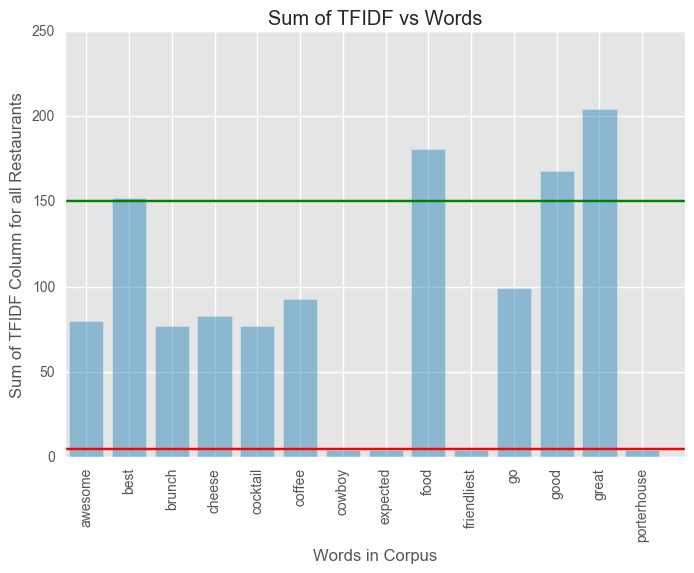

In [76]:
from matplotlib import pyplot as plt
from matplotlib import style

# use ggplot style sheet
style.use('ggplot')

plt.bar(list(sampleFrq.index), list(sampleFrq['SumTFIDF'].values), align='center', alpha=0.5)
plt.xticks(arange(14), sort(tuple(sampleFrq['Words'].values)), rotation=90)
plt.xlabel('Words in Corpus')
plt.ylabel('Sum of TFIDF Column for all Restaurants')
plt.title('Sum of TFIDF vs Words')

plt.plot((-0.5, 14), (5, 5), 'r', label='Too Frequent')
plt.plot((-0.5, 14), (150, 150), 'g', label='Too Infrequent')
 
plt.show()

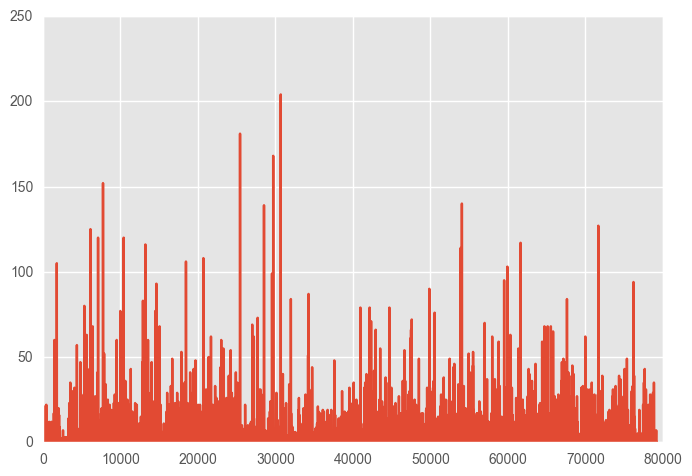

In [77]:
from matplotlib import pyplot as plt
from matplotlib import style

# use ggplot style sheet
style.use('ggplot')

plt.plot(np.array(freq))

plt.show()

In [78]:
freq = []

for col in tokenMatrix:
    freq.append(int(tokenMatrix[col].sum()))
    
print freq[1:10]

[2, 1, 2, 1, 1, 1, 2, 1, 1]


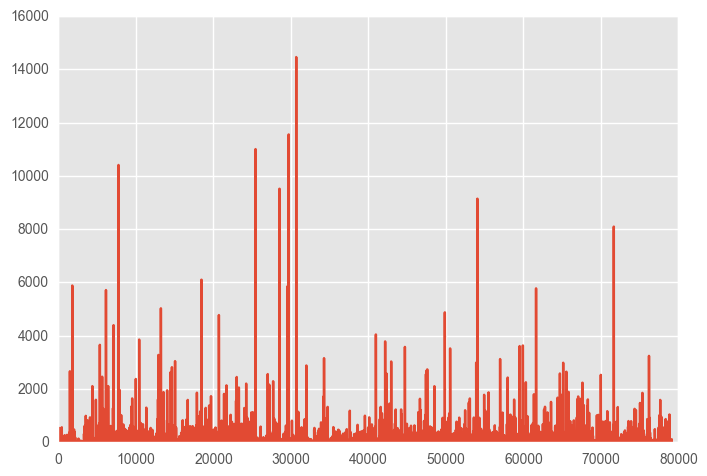

In [79]:
from matplotlib import pyplot as plt
from matplotlib import style

# use ggplot style sheet
style.use('ggplot')

plt.plot(np.array(freq))

plt.show()

In [80]:
redundantCols = []

for row in tfidfDataFrame:
    if tfidfDataFrame[row].sum() < 5 or tfidfDataFrame[row].sum() > 150:
        redundantCols.append(row)
        
for row in tfidfDataFrame:
    if tfidfDataFrame[row].sum() > 150:
        print row

best
food
good
great


In [81]:
tfidfCore = tfidfDataFrame.drop(redundantCols, axis=1)

display(tfidfCore[['price']][tfidfCore['price']>0][1:5])

,price
5,0.070117
6,0.031631
8,0.026752
11,0.036090


In [82]:
display(tfidfCore)

,able,absolute,absolutely,accommodating,across,actually,add,added,addition,adorable,...,year,yes,yet,yogurt,york,young,yourselffavor,yum,yummy,zucchini
0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.000000,0.035166,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.040819,0.000000,...,0.000000,0.000000,0.037218,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
5,0.0,0.000000,0.000000,0.0,0.000000,0.056159,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
6,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.092176,0.000000,0.058622,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
7,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.031799,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.057977,0.0,0.0,0.000000,0.000000,0.0
8,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
9,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


In [83]:
combinedAll['Index'] = combinedAll.index
tfidfCore['Index'] = tfidfCore.index

#Renaming because these words are also present in tfidf matrix
combinedAll = combinedAll.rename(columns={'price': 'restaurantPrice', 'city':'restaurantCity', 'country':'restaurantCountry', \
                                         'state': 'restaurantState', 'name': 'restaurantName'})

final = pd.merge(combinedAll, tfidfCore, how='inner', on='Index')

#final = pd.concat([combinedAll, tokenMatrixCore], axis=1, join_axes=[combinedAll.index])

In [84]:
final = final.drop('level_0', axis=1)
print display(final)

,index,restaurantPrice,id,restaurantCity,restaurantCountry,restaurantState,rating,ratingSignals,photos,likes,...,year,yes,yet,yogurt,york,young,yourselffavor,yum,yummy,zucchini
0,0,2,53c80344498eae8c726bc547,New York,United States,NY,6.9,25.0,20.0,17.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,1,2,5403c5f5498e07039eb52e53,New York,United States,NY,8.3,41.0,31.0,23.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
2,2,2,514b5d04fe70d90c81337d4c,Austin,United States,TX,6.5,24.0,13.0,17.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
3,3,2,53e556a3498ed7b6e9d498d2,New York,United States,NY,7.4,53.0,24.0,29.0,...,0.000000,0.000000,0.037218,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
4,4,3,52aa54ec11d261e0be7777b8,New York,United States,NY,6.6,56.0,56.0,32.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
5,5,2,51ef14d6498e0e94e8ba53a9,New York,United States,NY,7.6,74.0,38.0,48.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
6,6,1,542c7a91498e8670fab116de,San Francisco,United States,CA,8.6,25.0,11.0,17.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
7,7,3,44d9e8dbf964a5208a361fe3,New York,United States,NY,8.5,1096.0,1128.0,735.0,...,0.000000,0.000000,0.000000,0.0,0.057977,0.0,0.0,0.000000,0.000000,0.0
8,8,2,47f64f56f964a520a94e1fe3,San Francisco,United States,CA,9.4,396.0,333.0,318.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
9,9,4,45e6c3e8f964a5204e431fe3,Austin,United States,TX,7.7,46.0,91.0,28.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


None


In [85]:
final = final.rename(columns={'tip_without_letter': 'all_tips_concat'})

output = final.drop(['Index','tokenized_sents','filtered_words','stemmed_words','stemmed_sentences'], axis=1)

In [86]:
output = output.dropna()
output.to_csv('tfidfData.csv', encoding='utf-8', index=False)

In [87]:
len(output)

5099

In [88]:
list(output.columns)

['index',
 'restaurantPrice',
 'id',
 'restaurantCity',
 'restaurantCountry',
 'restaurantState',
 'rating',
 'ratingSignals',
 'photos',
 'likes',
 'postalCode',
 'restaurantName',
 'all_tips_concat',
 'count of tips',
 'able',
 'absolute',
 'absolutely',
 'accommodating',
 'across',
 'actually',
 'add',
 'added',
 'addition',
 'adorable',
 'affordable',
 'afternoon',
 'aged',
 'ago',
 'ahead',
 'ahi',
 'aioli',
 'air',
 'al',
 'alcohol',
 'ale',
 'alla',
 'almond',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'alternative',
 'although',
 'always',
 'amazing',
 'amazingly',
 'ambiance',
 'ambience',
 'america',
 'american',
 'among',
 'amount',
 'andgreat',
 'another',
 'anymore',
 'anyone',
 'anything',
 'anywhere',
 'app',
 'apparently',
 'appetizer',
 'apple',
 'apps',
 'area',
 'aremust',
 'around',
 'art',
 'artichoke',
 'arugula',
 'as',
 'asada',
 'asian',
 'ask',
 'asked',
 'asparagus',
 'ate',
 'atmosphere',
 'attention',
 'attentive',
 'attitude',
 'au',
 'austin',
 

In [89]:
print len(pd.DataFrame(np.unique(final['id'])))

4993


# Decision Tree

In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=50)

# excluding user id
attributes = output.drop(['all_tips_concat'], axis=1).columns.values[12:]
target = output.columns.values[6]

# Holdout Evaluation

In [ ]:
## Train the model (fit the data)
train_data, test_data, train_target, test_target = train_test_split(output[attributes], output[target], train_size=0.80, random_state=100)

# Train the model Training Dataset
regr_1.fit(train_data,train_target)

# Test the model on Testing Dataset

expected = regr_1.predict(test_data)

In [ ]:
actual = np.array(test_target)
                  
mape = mean(abs((expected - actual)/actual*100))

In [ ]:
print mape

# Recommendation Engine

In [127]:
try:
    import numpy as np
    import pandas as pd
except:
    print "This implementation requires the numpy and pandas modules."
    exit(0)

In [128]:
def mapToInt(i):
    global newIds
    try: return newIds[i]
    except:
        newIds[i] = len(newIds.keys())
        return newIds[i]

In [129]:
tfidf = pd.read_csv('tfidfData.csv')

In [130]:
senti = pd.read_csv("tipsWithSentiments.csv")

In [131]:
groupedSenti = senti.groupby('venue_id')['sentiment','positivity','neutrality','negativity'].mean().reset_index(drop=False)

In [132]:
#display(tfidf)

In [153]:
modeldata = pd.merge(tfidf,groupedSenti,left_on='id', right_on='venue_id', how='inner').drop('index', 1)

In [154]:
modeldata.to_csv('modelData.csv', index=False)


In [155]:
display(modeldata[1:5])

,restaurantPrice,id,restaurantCity,restaurantCountry,restaurantState,rating,ratingSignals,photos,likes,postalCode,...,young,yourselffavor,yum,yummy,zucchini,venue_id,sentiment,positivity,neutrality,negativity
1,2.0,5403c5f5498e07039eb52e53,New York,United States,NY,8.3,41.0,31.0,23.0,10014,...,0.0,0.0,0.0,0.0,0.0,5403c5f5498e07039eb52e53,0.327542,0.267511,0.730392,0.002097
2,2.0,514b5d04fe70d90c81337d4c,Austin,United States,TX,6.5,24.0,13.0,17.0,78702,...,0.0,0.0,0.0,0.0,0.0,514b5d04fe70d90c81337d4c,0.279644,0.252778,0.643333,0.048333
3,2.0,53e556a3498ed7b6e9d498d2,New York,United States,NY,7.4,53.0,24.0,29.0,10009,...,0.0,0.0,0.0,0.0,0.0,53e556a3498ed7b6e9d498d2,0.202706,0.187137,0.709883,0.049647
4,3.0,52aa54ec11d261e0be7777b8,New York,United States,NY,6.6,56.0,56.0,32.0,10001,...,0.0,0.0,0.0,0.0,0.0,52aa54ec11d261e0be7777b8,0.311129,0.271175,0.669413,0.023698


In [170]:
austin = modeldata[modeldata['restaurantCity']=='Austin'].sort_values(by='rating', ascending = False)[1:4].reset_index()
newyork = modeldata[modeldata['restaurantCity']=='New York'].sort_values(by='rating', ascending = False)[1:4].reset_index()
#austin = modeldata[modeldata['restaurantCity']=='Austin'].sort_values(by='rating', ascending = False)[1:4].reset_index()

In [177]:
graphData = modeldata[['restaurantState','restaurantCity','restaurantName','rating']].groupby(['restaurantState','restaurantCity'], as_index=False).max()[1:10]

In [190]:
graphData = graphData[2:4]

In [166]:
austin['restaurantName']

0         Torchy's Tacos
1       Home Slice Pizza
2    Hopdoddy Burger Bar
Name: restaurantName, dtype: object

In [135]:
#display(modeldata)

In [136]:
#display(senti)

In [137]:
#Load sentiments from tips. Use them as implicit ratings.
tipSentiment = pd.read_table("tipsWithSentiments.csv", delimiter=',')

t_cols = []

for colName in tipSentiment.columns:
    t_cols.append(str(colName))
    
print t_cols


r_cols = []

for colName in aggr.columns:
    r_cols.append(str(colName))
    
print r_cols

['venue_id', 'user_id', 'id', 'likes', 'createdAt', 'collected', 'tip', 'sentiment', 'positivity', 'neutrality', 'negativity']
['price', 'id', 'city', 'country', 'state', 'rating', 'ratingSignals', 'photos', 'likes', 'postalCode', 'name']


In [2]:
#import graphlab

In [3]:
#graphlab.get_dependencies()

In [140]:
if __name__ == "__main__":
    
    try:
        # load ratings
        ratings = tipSentiment   
        restaurants = aggr.head(1000)
    except:
        print "Download the movie rating dataset from here: https://github.com/sidooms/MovieTweetings"
        exit(0)
        
    # create one merged DataFrame
    restaurant_ratings = pd.merge(restaurants, ratings, left_on='id', right_on='venue_id', how='inner')
    restaurants['index'] = restaurants.index

    ###########################################################################

    print "Exploratory analysis of our data set"    
    # What are the 25 most rated movies?
    most_rated = restaurant_ratings.groupby('venue_id').size().order(ascending=False)[:25]
    print most_rated

    # Which movies are most highly rated?
    restaurant_stats = restaurant_ratings.groupby('venue_id').agg({'sentiment': [np.size, np.mean]})
    #print movie_stats.head()
   
    # sort by rating average
    print restaurant_stats.sort([('sentiment', 'mean')], ascending=False).head()
    
    # Let's only look at movies that have been rated at least 100 times.    
    print restaurant_stats.loc[restaurant_stats['sentiment', 'size'] >= 100].sort([('sentiment', 'mean')], ascending=False)[:15]

    ###########################################################################
    
    print "Start building a recommender system"
    # map the ids of the movies to internal (consecutive integers) ids
    newIds = {}
    restaurant_ratings['venue_id2'] = restaurant_ratings['venue_id'].apply(mapToInt)
    
    #df['Period'] = df.Year.str.cat(df.Quarter)
    
    restaurant_ratings['rating_id'] = restaurant_ratings.venue_id.str.cat(restaurant_ratings.user_id.astype(str), sep='-')
    
    new_rest_rating = restaurant_ratings.drop_duplicates(['rating_id'], keep='last')
    
    
    R = new_rest_rating.pivot(index='user_id', columns='venue_id2', values='sentiment')
    # transform rating matrix to numpy format
    R = np.array(R)
    # 0 := missing ratings
    R[np.isnan(R)] = 0 
    print "Data was loaded: ", R.shape

    nP, s, nQ = np.linalg.svd(R, full_matrices=False)
    S = np.diag(s)
    R_hat = np.dot(nP, np.dot(S, nQ))
    print "Is this a good approximations?", np.allclose(R, R_hat)
    
    ###########################################################################

    # print results
    # Approximate (filled in) rating matrix
    print(R_hat)
    # Weights of latent dimensions for items
    #print(nQ)    
    # Weights of users for the same latent dimensions 
    #print(nP)
    
    # predict the ratings for the following movie: 2024506::Straight A's (2013)::Comedy|Drama
    print R_hat[:,42]
    
    # predict the ratings for the following movie: jOBS (2013)
    m = restaurants[restaurants['id']=='5474bbdb498e5a89964517ac']['index'].values[0]
    print R_hat[:,m]


C:\Users\Sahil Gupta\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sahil Gupta\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: FutureWarning: order is deprecated, use sort_values(...)
C:\Users\Sahil Gupta\Anaconda2\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Sahil Gupta\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Exploratory analysis of our data set
venue_id
5474bbdb498e5a89964517ac    88
5169c1b4498eb65b81bd735a    86
539314fe498e2faabd486493    73
453a2ab0f964a520e63b1fe3    69
4ddc3574c65bfd579e0e0265    68
544153df498e8f7dae118d8e    66
55665f1c498e01976141b08b    63
4a10af0af964a520f4761fe3    62
5455bb2c498ed7a6b8c639e4    62
538660d4498ea4ed73caabc5    60
41c76780f964a520961e1fe3    58
4c9a56329c66370486cd57fd    58
544a8ac6498e5b1f7a9ea870    57
49ec92dff964a5206a671fe3    56
49cd4e37f964a520db591fe3    56
4fadc40de4b0efef5e702b95    54
542aa73f498e550c05e178d7    53
51b5da44011cd1b8ea099985    52
43eb7d31f964a520392f1fe3    52
54511908498ef875450a0c8f    52
4e555696d4c0c50afda6168f    52
54459a46498ecf8ec204cc61    51
49b70b09f964a52018531fe3    50
53644323498e8964add3b940    50
4aea176df964a52047b921e3    48
dtype: int64
                         sentiment          
                              size      mean
venue_id                                    
52ed36f511d2e0abd9fc8f11      1

In [92]:
m = restaurants[restaurants['id']=='5474bbdb498e5a89964517ac']['index'].values[0]
print R_hat[:,m]

[ -1.98077093e-16   1.83619749e-16  -1.87948273e-17 ...,  -1.07331078e-16
   1.48114650e-17   1.45599001e-16]


In [93]:
print restaurants[restaurants['id']=='5474bbdb498e5a89964517ac']['index'].values[0]

56


In [95]:
e = 0
# for each user
for i in xrange(len(R)):
    # and each items
    for j in xrange(len(R[i])):
         # if we observed the corresponding rating
        if R[i][j] > 0:
            # add to the loss the squared error (i.e. (r-r_hat)^2 )
            e = e + pow(R[i][j] - R_hat[i][j],2)
print e
print "Is this a good approximations?", np.allclose(R, R_hat)

2.27450134033e-27
Is this a good approximations? True


In [96]:
#Just checking if the length of vector = number of restaurants
a = 2
print R_hat[:,2]

[ -3.66306079e-17   7.53474547e-17   6.38762261e-18 ...,   5.43600307e-17
  -6.42393012e-18  -1.15914164e-17]


In [222]:
# Enter User_Id
userToBeRecommended = 37


userList = pd.DataFrame(np.unique(new_rest_rating['user_id']))

userList['index'] = userList.index

user = userList[userList[0] == userToBeRecommended]['index'].values[0]

In [223]:
print user

2


In [235]:
recos = pd.concat([pd.Series(R[user,:]).rename("Rating Provided by User"), pd.Series(R_hat[user,:]).rename("Expected") \
                   , restaurants['id'][:len(R[user,:])]], axis=1)

### Top 5 Restaurants as per User's Actual Ratings or Feedback 

In [239]:
recoId =  recos.sort(["Rating Provided by User"],ascending=[0])[0:2]

recoName = pd.merge(recoId, restNames, on = 'id' , how='inner').rename(columns = {'name' : 'RestaurantName'}).reset_index()
intermediate = recoName.drop_duplicates(subset=['id'], take_last=True).drop('Expected', 1).drop('index',1).reset_index()
intermediate['rank'] = intermediate.index + 1
display(intermediate.drop('index',1))

C:\Users\Sahil Gupta\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
C:\Users\Sahil Gupta\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead


,Rating Provided by User,id,RestaurantName,rank
0,0.261175,4e8b58eb7ed151621f9a8cde,Rainforest Cafe,1
1,0.071300,44d9e8dbf964a5208a361fe3,Dean & DeLuca,2


In [226]:
restNames = df[['id','name']].drop_duplicates(subset=['id', 'name'])

### Top 5 recommendations

In [238]:
recoId = recos[recos["Rating Provided by User"]==0].sort(["Expected"],ascending=[0])[0:5]

#Pulling the names of the recommended restaurants
recoName = pd.merge(recoId, restNames, on = 'id' , how='inner').rename(columns = {'name' : 'RestaurantName'})
intermediate = recoName.drop_duplicates(subset=['id'], take_last=True).drop('Expected', 1).reset_index()
intermediate['rank'] = intermediate.index
display(intermediate.drop('index',1))

C:\Users\Sahil Gupta\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
C:\Users\Sahil Gupta\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: the take_last=True keyword is deprecated, use keep='last' instead


,Rating Provided by User,id,RestaurantName,rank
0,0.0,440db456f964a52097301fe3,Brickhouse Cafe,0
1,0.0,4391dff1f964a520652b1fe3,Fontana's Bar,1
2,0.0,49b7aefcf964a5202d531fe3,Cipriani,2
3,0.0,4bd625987b1876b0a41b8c86,NaN,3
4,0.0,4e4f2390a80997aa8a35b961,Chile Pies,4
